In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os

# --- Jupyter Magic Command ---
# Ensures the plot is displayed inline in the notebook output
%matplotlib inline 

# --- Configuration ---
# *** IMPORTANT: Replace with your actual file path! ***
WAV_FILE_PATH = "my_stereo_file.wav" 

# --- Visualization Function ---

def visualize_channels_overlaid(file_path):
    """
    Loads a WAV file and overlays all channels on a single plot with distinct colors.
    """
    try:
        # 1. Read the audio file
        rate, data = wavfile.read(file_path)

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        return
    except Exception as e:
        print(f"Error reading WAV file: {e}")
        return

    # 2. Determine Channel Count and Data Shape
    if data.ndim == 1:
        # Mono file
        num_channels = 1
        num_samples = len(data)
        channels_data = data.reshape(-1, 1) # Convert to 2D for consistent handling
    else:
        # Stereo or Multi-channel file
        num_samples, num_channels = data.shape
        channels_data = data
    
    if num_channels == 0:
        print("Error: No audio data found.")
        return

    print(f"File: {os.path.basename(file_path)} | Channels: {num_channels} | Rate: {rate} Hz")

    # 3. Create Time Axis
    # Time (seconds) = Sample Index / Sample Rate
    time_vector = np.linspace(0, num_samples / rate, num=num_samples)

    # 4. Plot All Channels on a Single Axis
    plt.figure(figsize=(14, 6))
    plt.title(f"Overlaid Waveforms: {os.path.basename(file_path)} ({num_channels} Channels)", fontsize=16)
    plt.xlabel("Time (seconds)")
    plt.ylabel("Amplitude")
    
    # Define distinct colors for clear visualization of overlap
    # If you have more than 4 channels, the colors will repeat from the start.
    colors = ['#FF4500',  # Red (Channel 1)
              '#007ACC',  # Blue (Channel 2)
              '#32CD32',  # Green (Channel 3)
              '#9400D3']  # Purple (Channel 4)

    for i in range(num_channels):
        # Extract the data for the current channel (the i-th column)
        channel_data = channels_data[:, i]
        
        # Plot the data
        plt.plot(
            time_vector, 
            channel_data, 
            label=f'Channel {i+1}', 
            color=colors[i % len(colors)],
            linewidth=0.8 # Thicker line for better visibility on overlap
        )

    # Add legend and display
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


File: sharp-sweep_0_0_corrected.wav | Channels: 2 | Rate: 44100 Hz


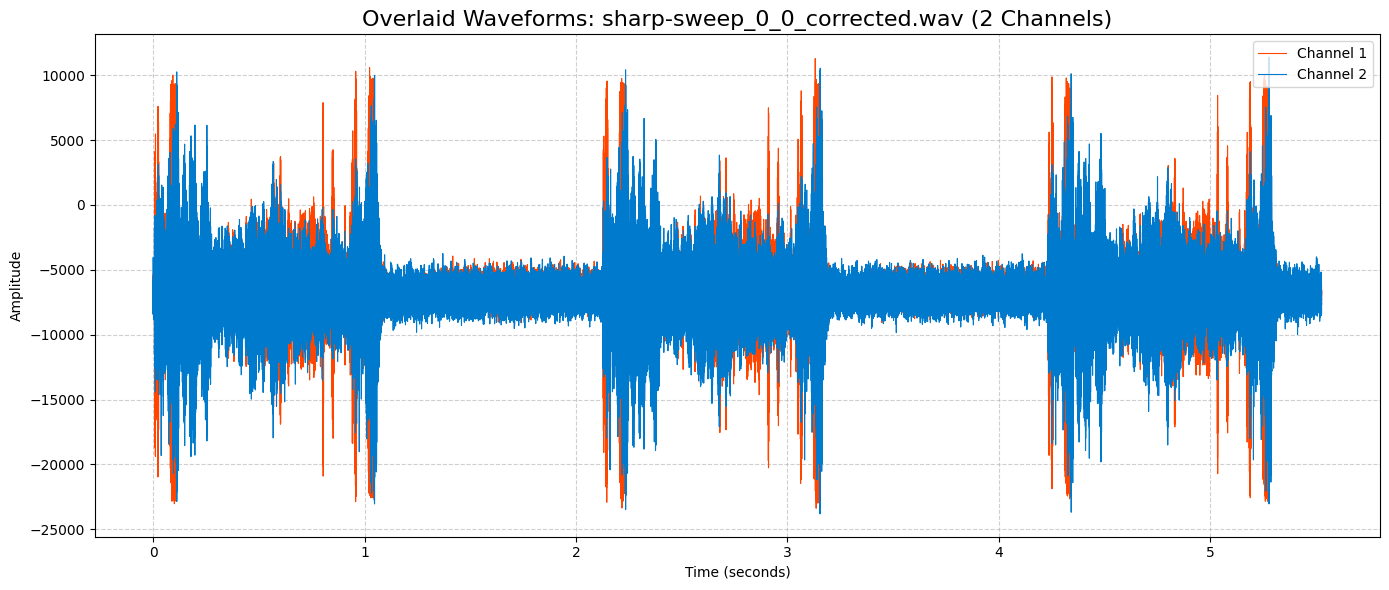

File: sharp-sweep_0_3_corrected.wav | Channels: 2 | Rate: 44100 Hz


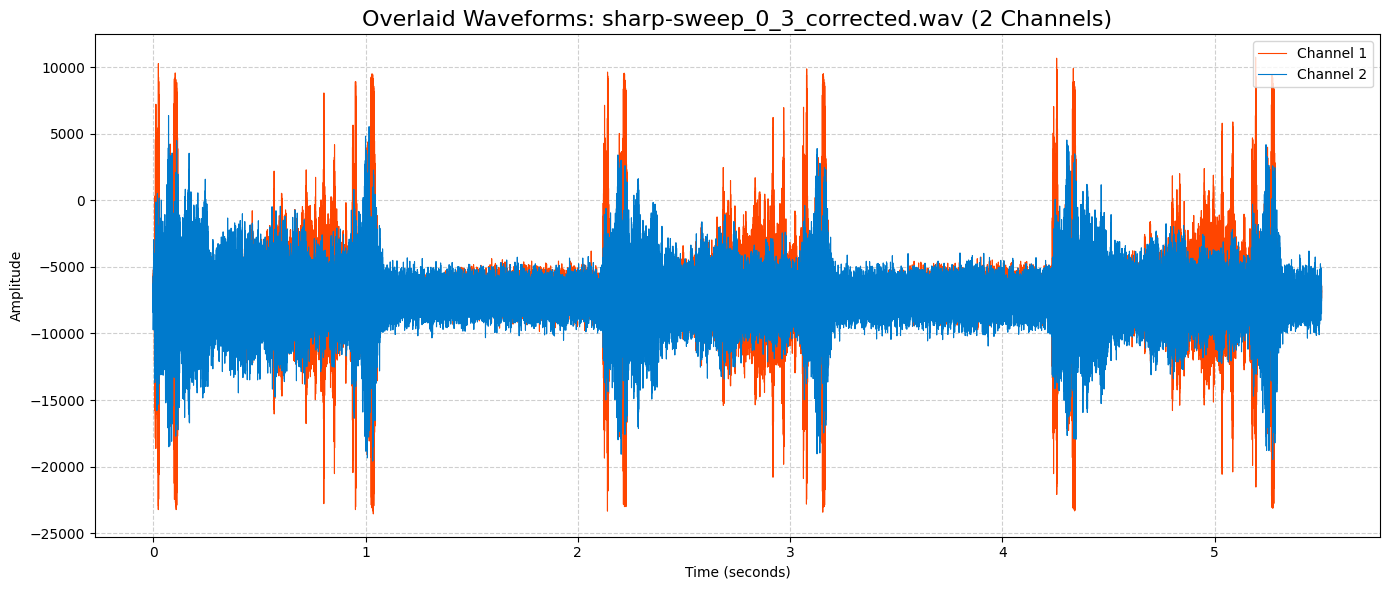

File: sharp-sweep_0_5_corrected.wav | Channels: 2 | Rate: 44100 Hz


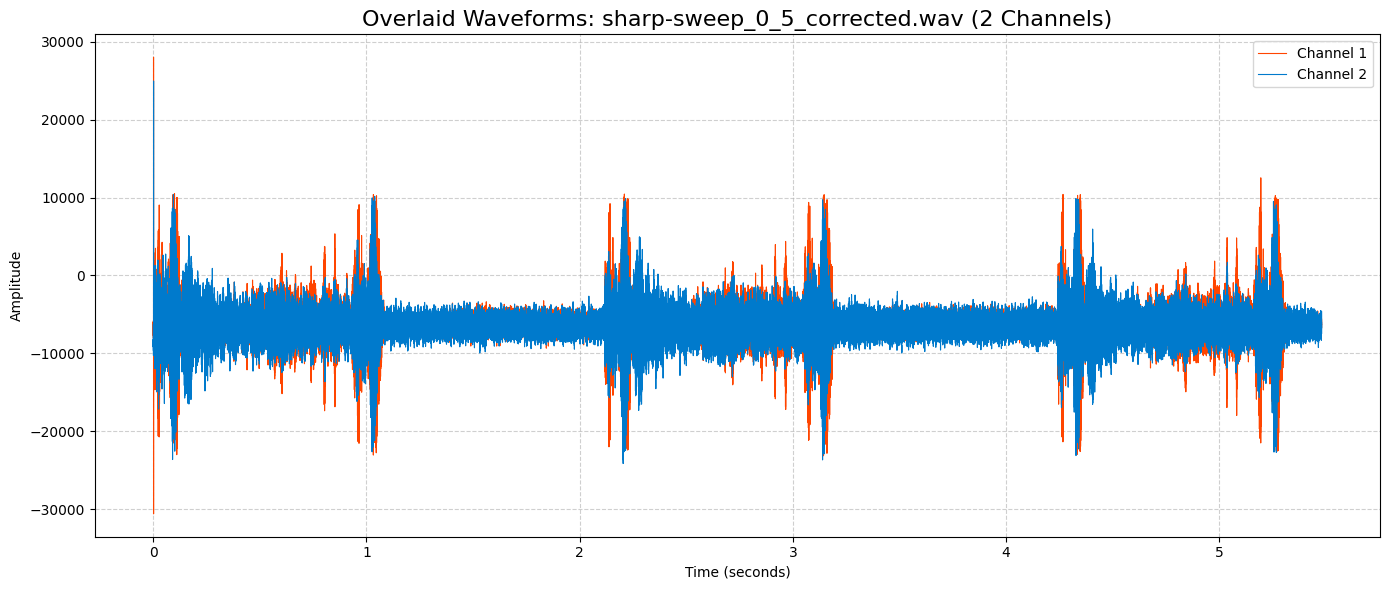

File: sharp-sweep_0_7_corrected.wav | Channels: 2 | Rate: 44100 Hz


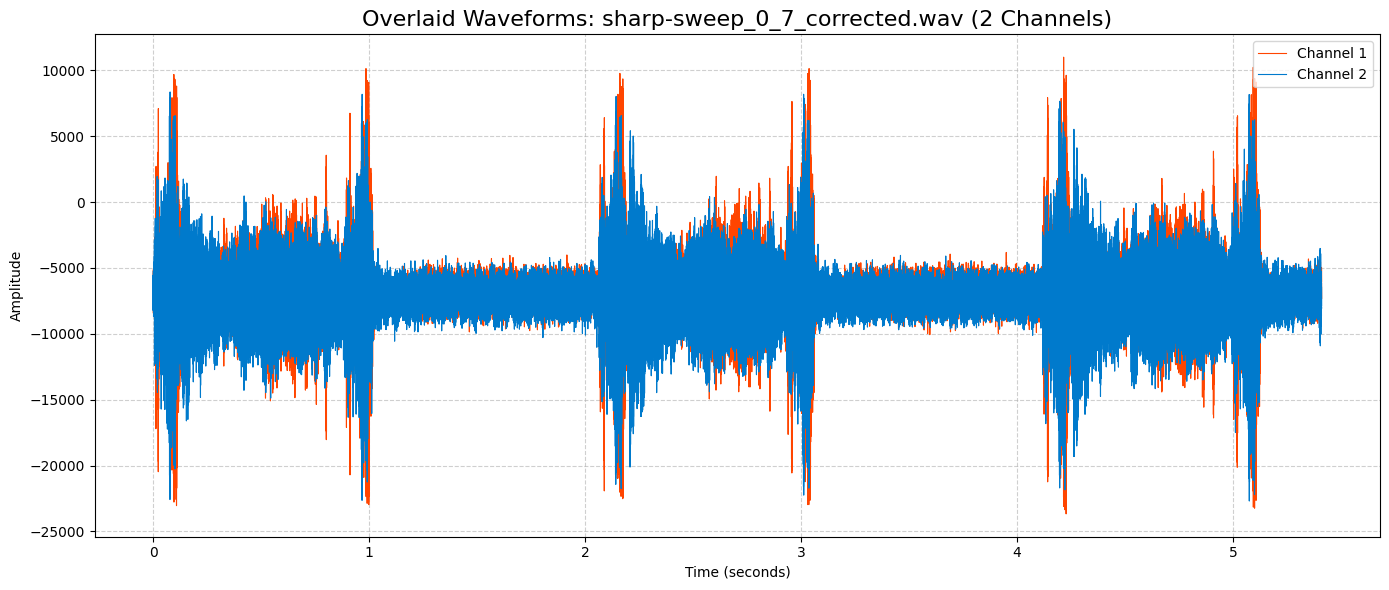

File: sharp-sweep_0_8_corrected.wav | Channels: 2 | Rate: 44100 Hz


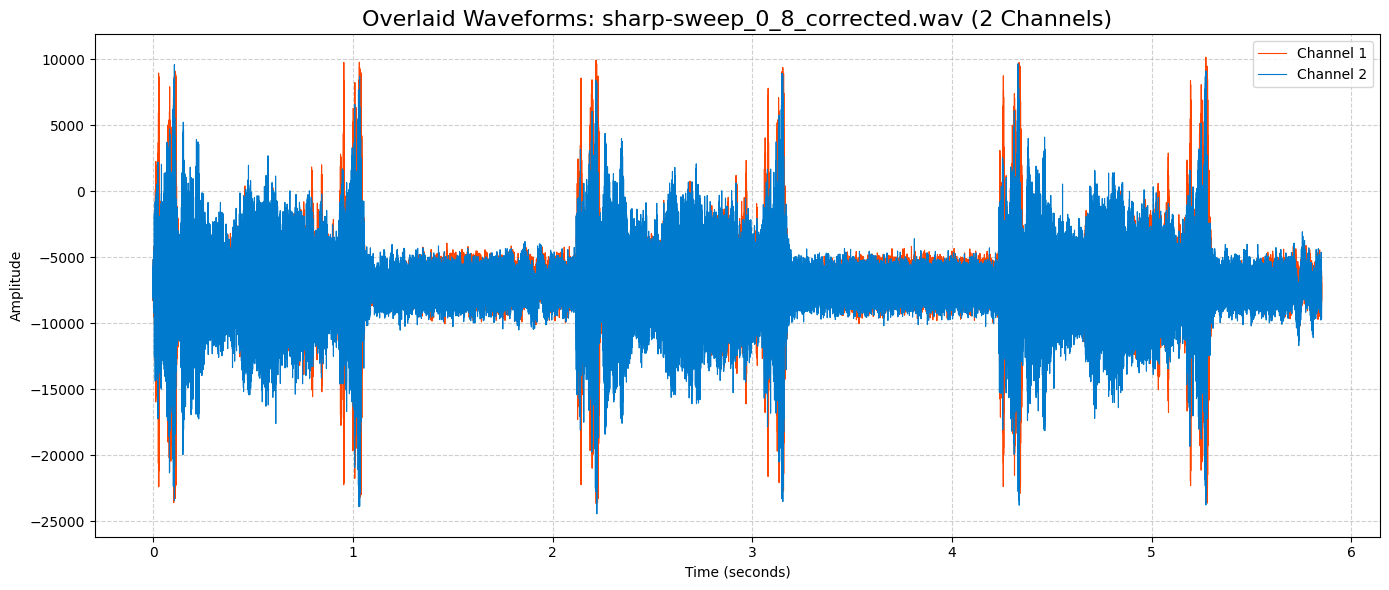

In [28]:
visualize_channels_overlaid("/Users/zack/ECE5730/microcontrollers/wav-fixed/sharp-sweep_0_0_corrected.wav")
visualize_channels_overlaid("/Users/zack/ECE5730/microcontrollers/wav-fixed/sharp-sweep_0_3_corrected.wav")
visualize_channels_overlaid("/Users/zack/ECE5730/microcontrollers/wav-fixed/sharp-sweep_0_5_corrected.wav")
visualize_channels_overlaid("/Users/zack/ECE5730/microcontrollers/wav-fixed/sharp-sweep_0_7_corrected.wav")
visualize_channels_overlaid("/Users/zack/ECE5730/microcontrollers/wav-fixed/sharp-sweep_0_8_corrected.wav")